In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from ydata_profiling import ProfileReport
import sweetviz as sv

In [3]:
# 读取数据
file_path = r"C:\Users\Runker\Desktop\feature_dy.csv"
data = pd.read_csv(file_path)
# data.rename(columns={'有机质含量':'SOM'},inplace=True)
data.head()

,pH,BIO,PRE,SRA,TMP,VAP,WIN,NDVI,TDQS,LIGHT,...,PlanCurvature,ProfileCurvature,RelativeSlopePosition,Slope,TopographicWetnessIndex,TotalCatchmentArea,ValleyDepth,DEM,LON,LAT
0,7.00,190.86998,98.666664,13017.417,16.433334,1.590833,1.550000,4957.3335,11,0.38,...,0.000212,0.002410,0.098463,0.044694,5.466934,71.02434,63.278564,659.9,477615.0,2912145.0
1,6.26,190.86998,98.666664,13017.417,16.433334,1.590833,1.550000,4957.3335,11,0.44,...,0.001302,0.009316,0.173775,0.372854,4.767581,317.61050,38.721313,663.8,477545.0,2912550.0
2,5.00,190.69460,98.666664,13014.500,16.366667,1.585833,1.550000,5189.5835,11,0.29,...,0.001092,-0.001505,0.887517,0.199547,5.328438,237.03818,8.369263,809.8,477515.0,2911055.0
3,4.56,193.19330,101.250000,12963.917,15.275001,1.498333,1.675000,4545.4165,12,0.51,...,-0.001674,-0.001910,0.630447,0.119424,7.580021,1175.15450,5.527954,985.5,477550.0,2903650.0
4,5.26,193.27090,101.500000,12942.083,15.025000,1.472500,1.716667,4545.4165,12,0.49,...,-0.002633,0.001256,0.309874,0.121057,5.209813,128.14406,7.989014,1053.9,476955.0,2903835.0


In [4]:
data.columns

Index(['pH', 'BIO', 'PRE', 'SRA', 'TMP', 'VAP', 'WIN', 'NDVI', 'TDQS', 'LIGHT',
       'AnalyticalHillshading', 'Aspect', 'ChannelNetworkBaseLevel',
       'ChannelNetworkDistance', 'ClosedDepressions', 'ConvergenceIndex',
       'LSFactor', 'PlanCurvature', 'ProfileCurvature',
       'RelativeSlopePosition', 'Slope', 'TopographicWetnessIndex',
       'TotalCatchmentArea', 'ValleyDepth', 'DEM', 'LON', 'LAT'],
      dtype='object')

In [5]:
data.describe(),data.shape

(                pH          BIO          PRE           SRA          TMP  \
 count  6498.000000  6498.000000  6498.000000   6498.000000  6498.000000   
 mean      5.678472   192.269225   100.411999  12967.264007    15.294090   
 std       0.818039     1.885229     1.364612     96.389572     0.705811   
 min       3.430000   186.959170    96.750000  12663.583000    12.458333   
 25%       5.090000   191.116112    99.583336  12906.000000    14.958333   
 50%       5.520000   192.242760   100.333336  12978.333000    15.408333   
 75%       6.140000   193.281148   101.083336  13031.312250    15.758333   
 max       8.560000   200.715650   107.666664  13208.750000    17.333334   
 
                VAP          WIN         NDVI         TDQS        LIGHT  ...  \
 count  6498.000000  6498.000000  6498.000000  6498.000000  6498.000000  ...   
 mean      1.506894     1.706166  5765.896086    11.262081     0.567608  ...   
 std       0.059760     0.086053   626.810051     0.532848     0.775211  .

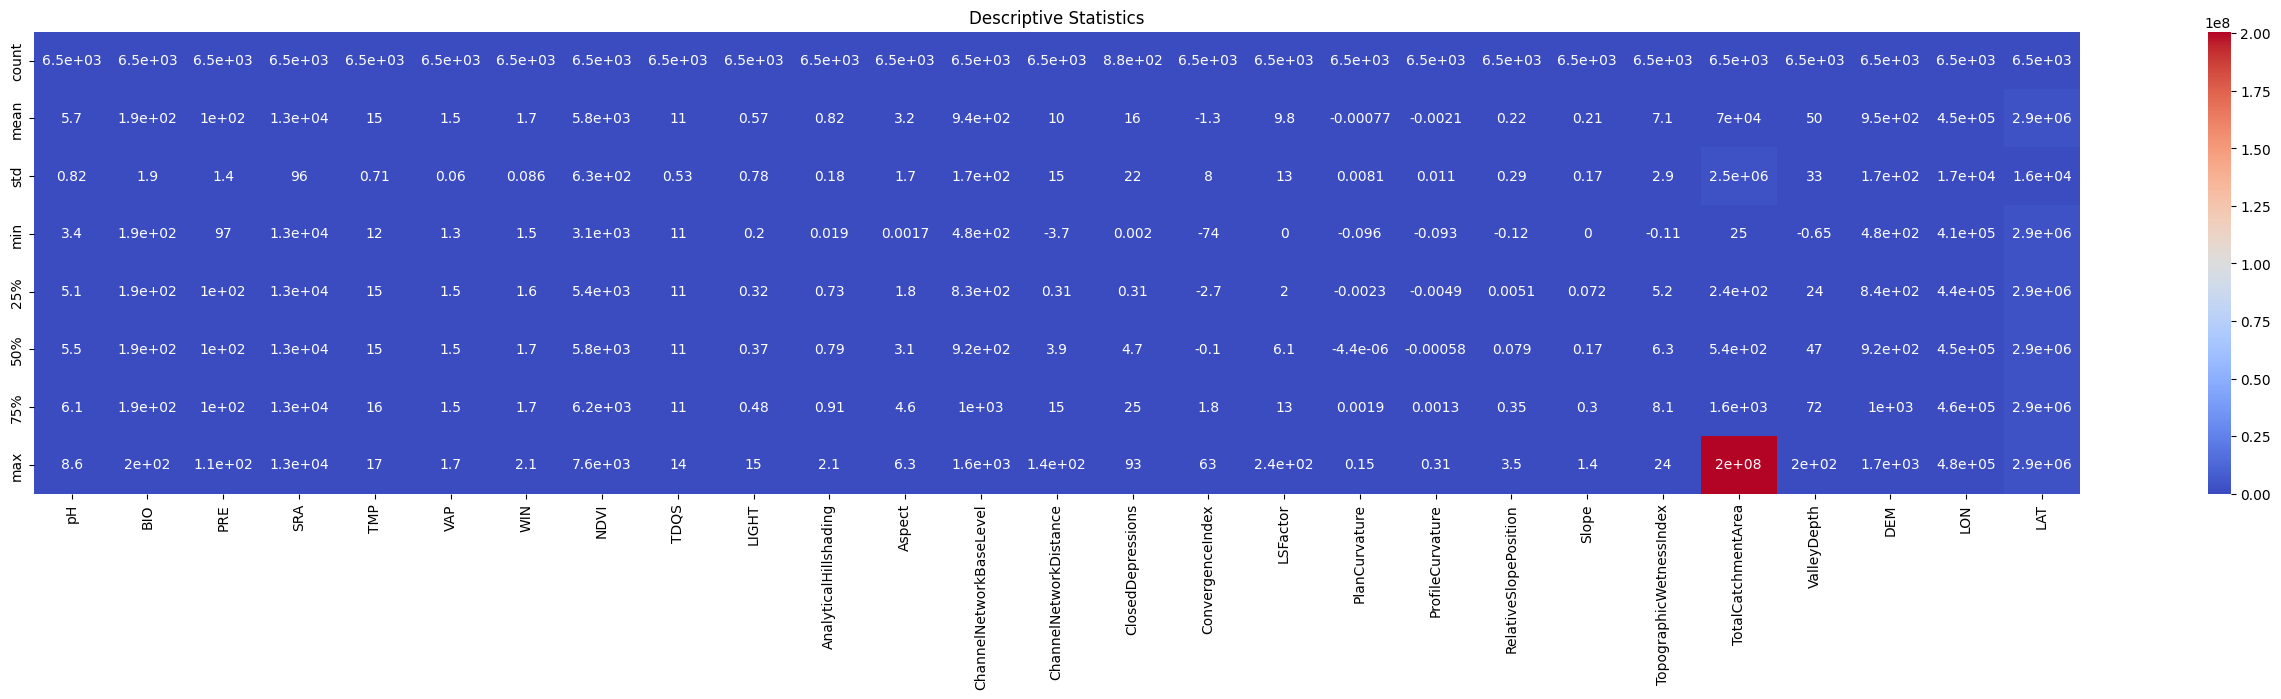

In [6]:
# 绘图
%matplotlib inline
plt.figure(figsize=(33, 6))
sns.heatmap(data.describe(), annot=True, cmap='coolwarm')
plt.title('Descriptive Statistics')
plt.show()



In [7]:
# 区分类别特征
data['TDQS'] = data['TDQS'].astype('str')

In [8]:
# 查看分析报告
profile = ProfileReport(data,title="Pandas Profiling Report")
# 导出数据分析报告
profile.to_file(r"C:\Users\Runker\Desktop\feature_dy.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# 查看分析报告
sv_file = sv.analyze(data,target_feat='pH',pairwise_analysis="on")
# 导出数据分析报告
sv_file.show_html(filepath=r"C:\Users\Runker\Desktop\feature_dy_sv.html")

                                             |          | [  0%]   00:00 -> (? left)

Report C:\Users\Runker\Desktop\feature_dy_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
